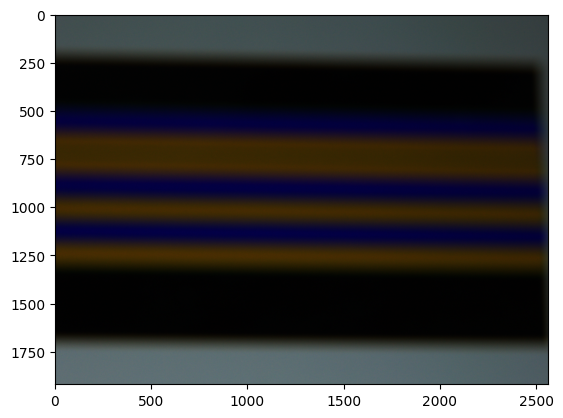

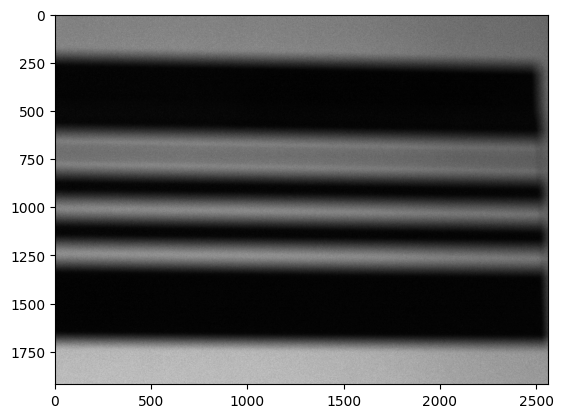

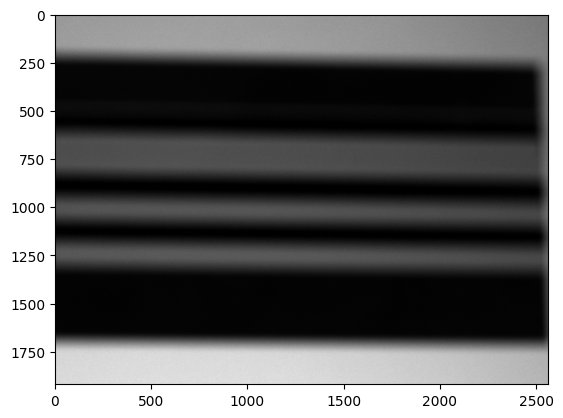

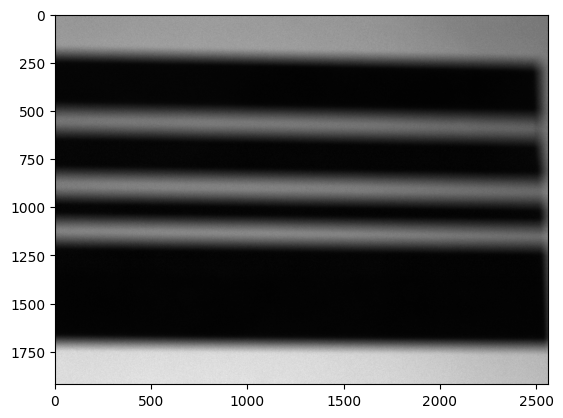

In [46]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

image = cv2.imread("farbcode_test.png")
plt.imshow(image)
plt.show()
blue, green, red = cv2.split(image)

plt.imshow(blue, cmap= 'gray')
plt.show()
plt.imshow(green, cmap= 'gray')
plt.show()
plt.imshow(red, cmap= 'gray')
plt.show()

get vertical scanline

blue scanline: [66 65 65 ... 90 92 93], shape: (1920,)
green scanline: [ 80  82  77 ... 114 111 112]
red scanline: [ 82  79  77 ... 111 113 113]


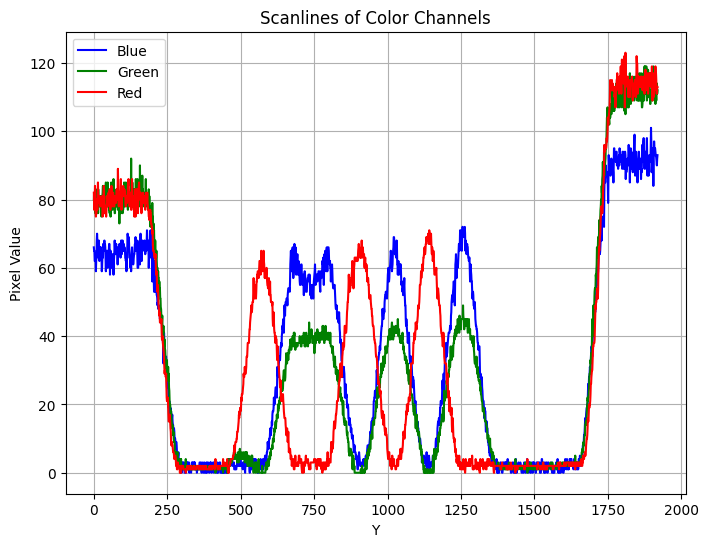

In [47]:
x = blue.shape[1]//2
scanline_blue = blue[:, x]
scanline_green = green[:, x]
scanline_red = red[:, x]
y = np.arange(0,blue.shape[0])
print(f"blue scanline: {scanline_blue}, shape: {scanline_blue.shape}")
print(f"green scanline: {scanline_green}")
print(f"red scanline: {scanline_red}")
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(y, scanline_blue, label='Blue', color='blue')
plt.plot(y, scanline_green, label='Green', color='green')
plt.plot(y, scanline_red, label='Red', color='red')
plt.xlabel('Y')
plt.ylabel('Pixel Value')
plt.title('Scanlines of Color Channels')
plt.legend()
plt.grid(True)
plt.show()

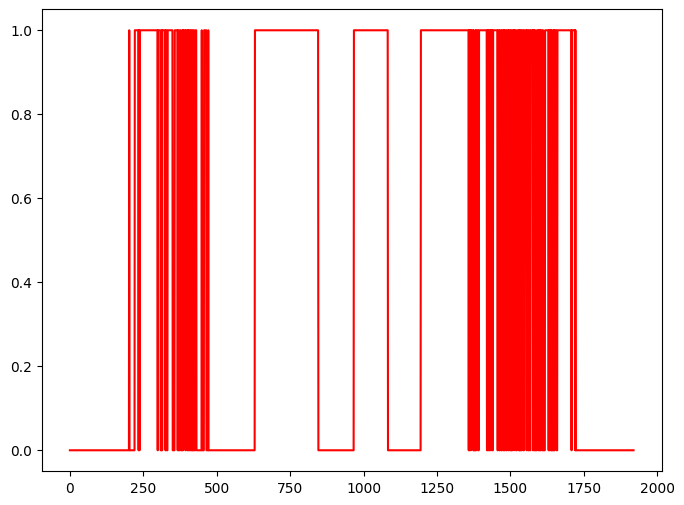

In [48]:
diff_rb = scanline_blue-scanline_red
thresh = 100
diff_rb = [ 1 if x <= thresh else 0 for x in diff_rb ]
plt.figure(figsize=(8, 6))
plt.plot(y, diff_rb, label= 'Diff Blue and red channel', color = 'red')
plt.show()


filtering

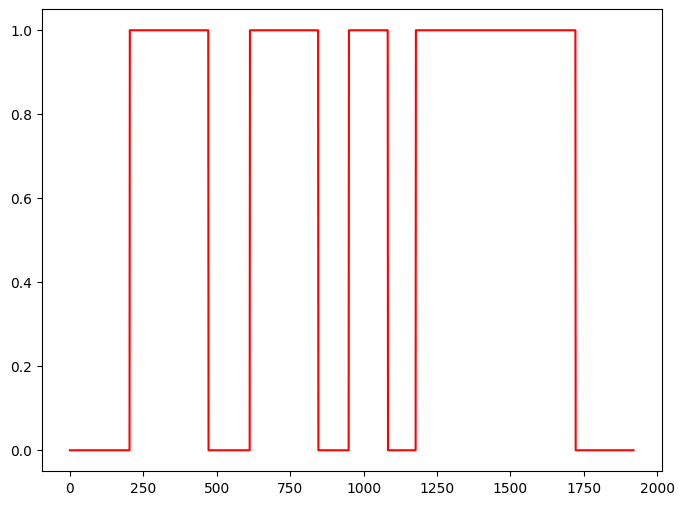

In [49]:
filter = np.ones(20)
for i in range (y.shape[0] - len(filter)):
    value = 0
    for j in range(len(filter)):
        value += diff_rb[i+j]*filter[j]
    diff_rb[i+1]= 1 if value/3 >0.5 else 0
plt.figure(figsize=(8, 6))
plt.plot(y, diff_rb, label= 'Diff Blue and red channel after filtering', color = 'red')
plt.show()

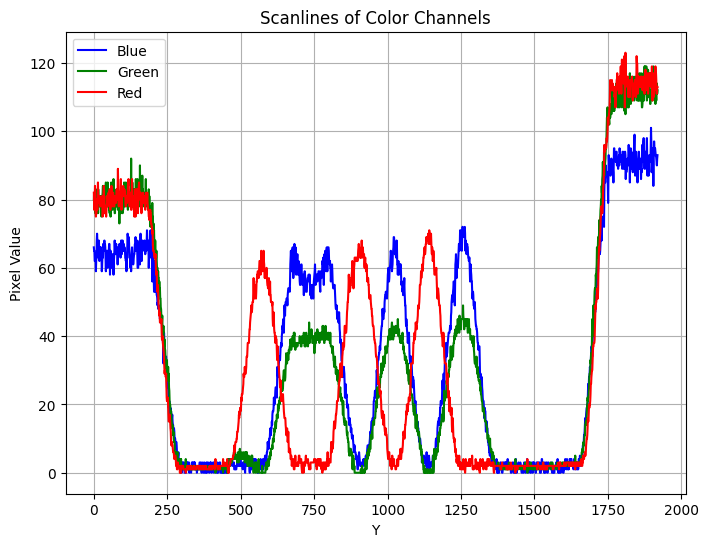

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(y, scanline_blue, label='Blue', color='blue')
plt.plot(y, scanline_green, label='Green', color='green')
plt.plot(y, scanline_red, label='Red', color='red')
plt.plot
plt.xlabel('Y')
plt.ylabel('Pixel Value')
plt.title('Scanlines of Color Channels')
plt.legend()
plt.grid(True)
plt.show()